In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
cd ..

/home/benjamin/Masterphase/Mastercode


In [1]:
from helper.helper import nn_exclude_training
from Ising.Data import IsingData
data = IsingData("Ising/huge_dataset/")

ModuleNotFoundError: No module named 'helper'

In [5]:
# generate needed intervals
x = 1.2+0.1*np.arange(22)
x, y = np.meshgrid(x,x)
intervals = [(x, y) for x, y in zip(x.flatten(), y.flatten())]
intervals_small = [(start, end) for end, start in intervals if end > start]
intervals_small=np.array(intervals_small)

#### Single training (for debug only)

In [8]:
from NN.ConvNN import ConvNN
n = ConvNN(16)
n.train(data.train_data[0], data.train_data[1],
        learning_rate=1e-5, epochs=20,
        valid_data=data.test_data[0], 
        valid_labels=data.test_data[1], progress_update=1)

After 1.446s of training (epoch 3/20)
Accuracy is 0.5299999713897705
After 2.921s of training (epoch 6/20)
Accuracy is 0.7400000095367432
After 4.391s of training (epoch 9/20)
Accuracy is 0.9200000166893005
After 5.869s of training (epoch 12/20)
Accuracy is 0.9399999976158142
After 7.337s of training (epoch 15/20)
Accuracy is 0.949999988079071
After 8.793s of training (epoch 18/20)
Accuracy is 0.9599999785423279
Training 20 epochs took 9.775s
Accuracy is 0.9599999785423279


In [9]:
weights = n._sess.run(n.weights)

In [22]:
np.argmin(data.test_data[2])

3700

In [15]:
weights["b2"]

array([ 0.14791606,  0.05208404], dtype=float32)

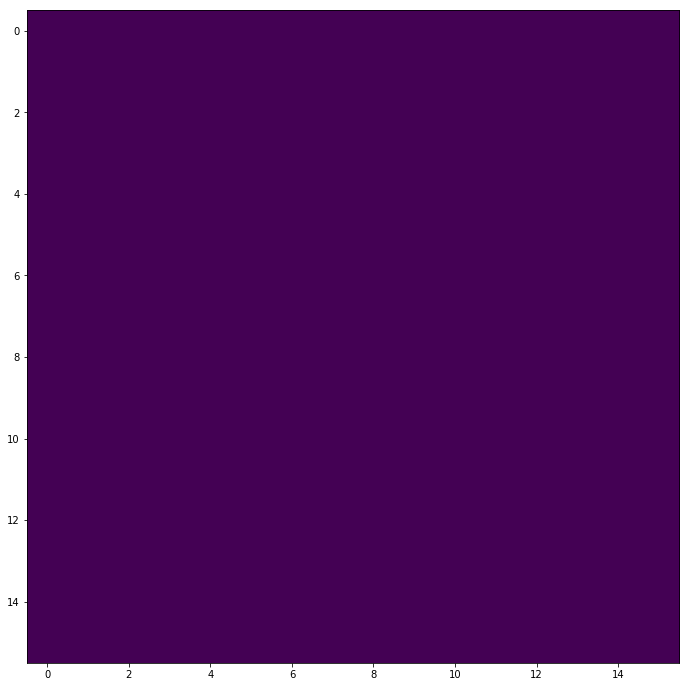

In [24]:
plt.imshow(np.reshape(data.test_data[0][3700,:], (16,16)))

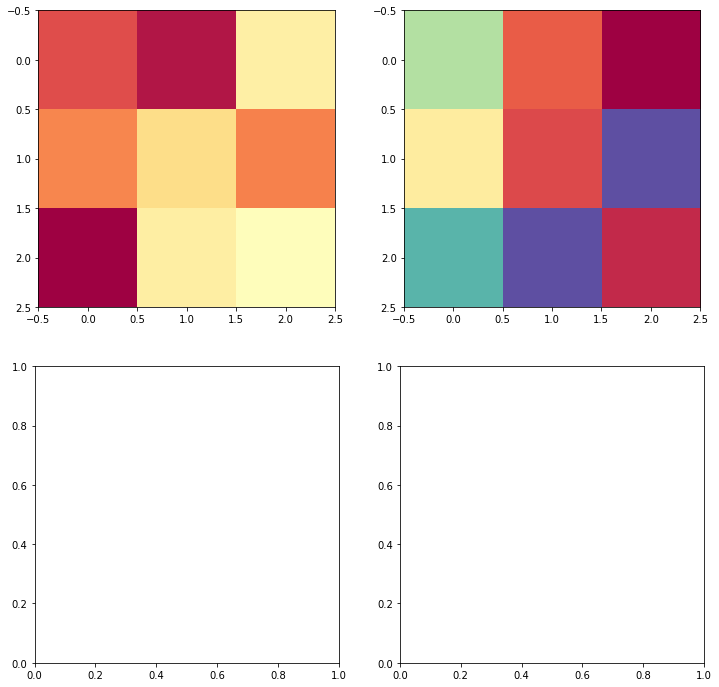

In [29]:
plt.rcParams['figure.figsize'] = (12, 12)

fig, axes = plt.subplots(2, 2)
for i in range(np.shape(weights["W_conv1"])[-1]):
    image = weights["W_conv1"][:,:,0,i]
    im=axes[i//2, i%2].imshow(image, vmin=-0.15, vmax=0.15, cmap='Spectral')
#fig.colorbar(mappable=im)

In [ ]:
n.layers

In [12]:
np.shape(n.layers["h1_conv"])

TensorShape([Dimension(None), Dimension(16), Dimension(16), Dimension(2)])

In [93]:
np.shape(weights["W2"])

(1024, 2)

(0, 50)

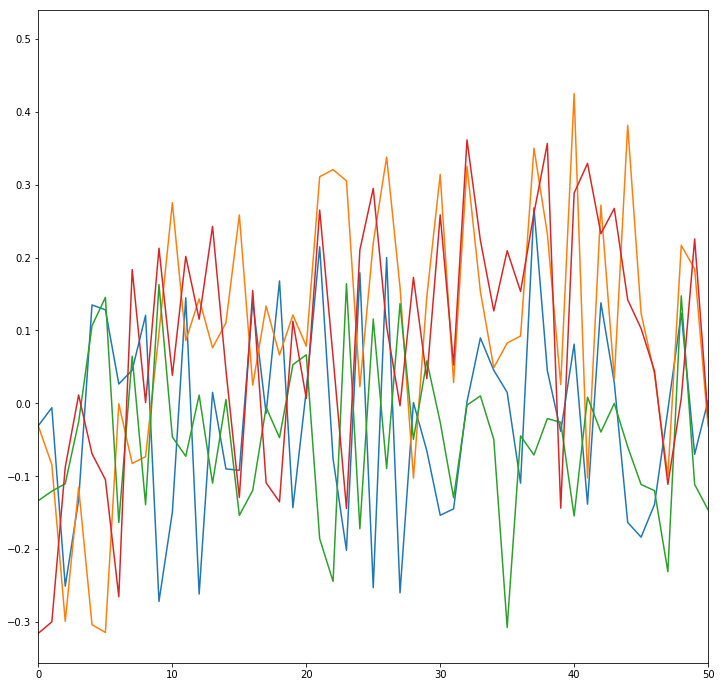

In [26]:
plt.plot(np.diff(weights["W2"][::4], axis=1))
plt.plot(np.diff(weights["W2"][1::4], axis=1))
plt.plot(np.diff(weights["W2"][2::4], axis=1))
plt.plot(np.diff(weights["W2"][3::4], axis=1))
plt.xlim([0,50])

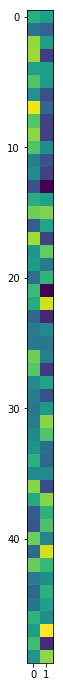

In [27]:
plt.imshow(weights["W2"][:50,:])

In [28]:
plt.imshow(np.reshape(weights["W2"][::4,1],(16,16)))
plt.show()
plt.imshow(np.reshape(weights["W2"][::4,0],(16,16)))

ValueError: cannot reshape array of size 128 into shape (16,16)

## Use model generatively

In [59]:
y = np.array([0])
n.layers["x"].evaluate(feed_dict={n.l["y"]:y})

AttributeError: 'Tensor' object has no attribute 'evaluate'